Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
450/450 [==============================] - 53s 117ms/step - loss: 1.8259 - accuracy: 0.2435 - val_loss: 1.8068 - val_accuracy: 0.2583
Epoch 2/10
450/450 [==============================] - 58s 129ms/step - loss: 1.7769 - accuracy: 0.2633 - val_loss: 1.6966 - val_accuracy: 0.3225
Epoch 3/10
450/450 [==============================] - 56s 124ms/step - loss: 1.6198 - accuracy: 0.3570 - val_loss: 1.4812 - val_accuracy: 0.4298
Epoch 4/10
450/450 [==============================] - 58s 128ms/step - loss: 1.4873 - accuracy: 0.4235 - val_loss: 1.3525 - val_accuracy: 0.4888
Epoch 5/10
450/450 [==============================] - 58s 128ms/step - loss: 1.4084 - accuracy: 0.4573 - val_loss: 1.3038 - val_accuracy: 0.5126
Epoch 6/10
450/450 [==============================] - 58s 129ms/step - loss: 1.3606 - accuracy: 0.4784 - val_loss: 1.2584 - val_accuracy: 0.5239
Epoch 7/10
450/450 [=========================

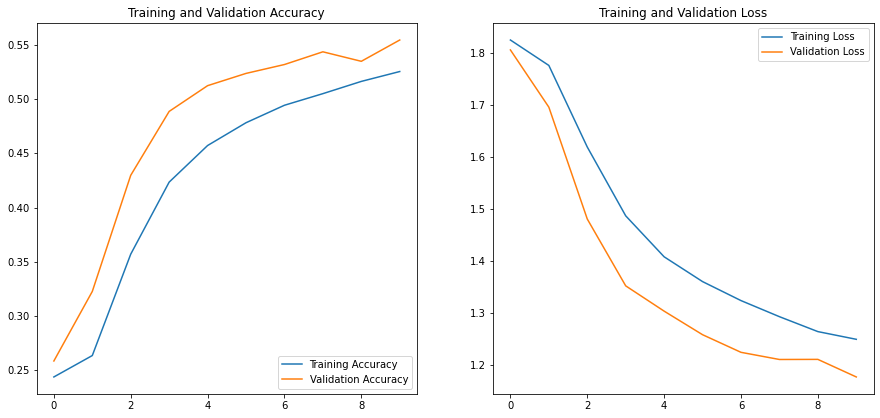

In [4]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Define hyperparameters
IMG_WIDTH = 48
IMG_HEIGHT = 48
BATCH_SIZE = 64
EPOCHS = 10

# Define directories
base_dir = './images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Define data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        class_mode='categorical')

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the model
model.save('emotion_detection_model.h5')

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
